# **LGMVIP - September Data Science Intern**

# **Iris Flowers Classification ML Project** :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

by Y.V.Krishna Chaitanya

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']

In [3]:
#dataset
df=pd.read_csv("/content/iris.data",names=col_name)

Summarize the dataset

In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

# **Data Visualization**

violin plot

Plotting the violin plot to check the comparison of a variable distribution:

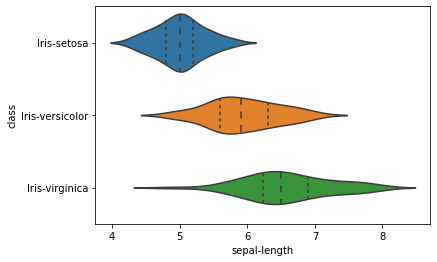

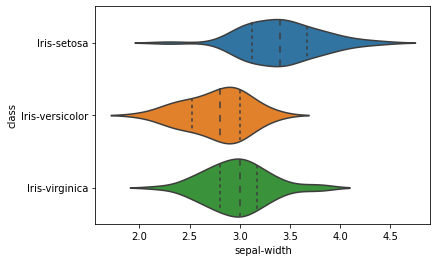

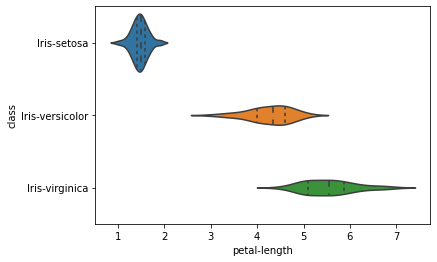

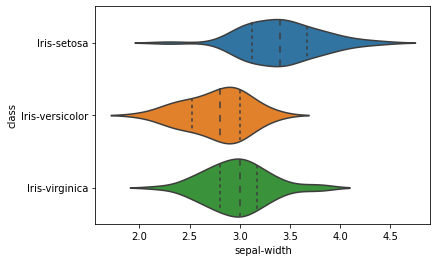

In [9]:
sns.violinplot(y='class', x='sepal-length',data=df,inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width',data=df,inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-length',data=df,inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width',data=df,inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

**Pair plot**

Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

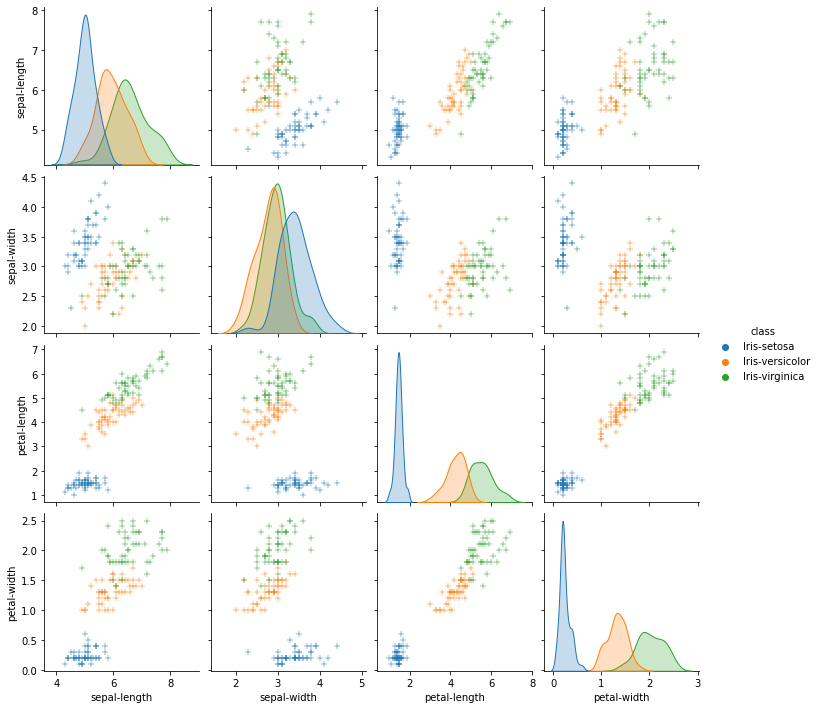

In [10]:
sns.pairplot(df,hue='class',markers='+')
plt.show()

From the above, we can see that Iris-Setosa is separated from both other species in all the features.

**Heatmap**

Plotting the heatmap to check the correlation.
dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

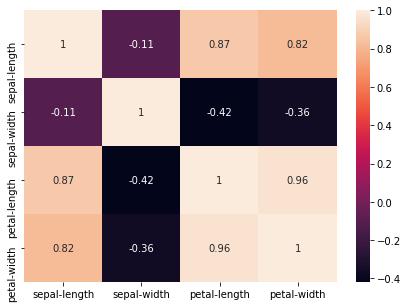

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Model Buliding**

x is having all the dependent variables.
y is having an independent variable (here in this case ‘class’ is an independent variable).

In [11]:
#Splitting the dataset
x=df.drop(['class'],axis=1)
y=df['class']
print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (150, 4) | y shape: (150,)


Here, we can see from the output that the X has 150 rows and 4 columns whereas Y has 150 rows and only one column.

**Train Test split**

Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

**Model Creation**

We don’t know which algorithms would be best for this problem.
Let’s check each algorithm in loop and print its accuracy, so that we can select our best algorithm.
Let’s test 6 different algorithms:

*  Logistic Regression (LR)
*  K-Nearest Neighbors (KNN).
*  Support Vector Machines (SVM).
*   Random Forest











Next, the Support Vector Machine model works on the principle of Radial Basis function with default parameters. We will be using the RBF kernel to check the accuracy.

In [ ]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9666666666666667


Randomforest is one of the highly accurate nonlinear algorithm, which works on the principle of Decision Tree Classification. Let us see how accurate it is:

In [ ]:
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9666666666666667


Logistic regression works on two schemes, first, if it is a binary classification problem, it works as one vs the rest, and if it is a multi class classification problem it works as one vs many.

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9666666666666667


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


We will use a k-nearest neighbors classifier.
To make a prediction for a new data point, the algorithm finds the point in the training set, then it assigns the label of this training point to the new data point.
The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (like one, or three neighbors — as the following image shows). We can now make a prediction using the majority class among them

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

Now we can call the fit method of the knn object, which takes as arguments the array X_train (containing the training data) and the array y_train (containing the corresponding training labels).This way, we are building our model on the training set.

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

We can now make predictions using this model on any new data for which we might not know the correct labels.
Let’s say we found an iris with the following measures:
1) sepal length of 5 cm
2) sepal width of 2.9 cm
3) petal length of 1 cm
4) petal width of 0.2 cm.
What species would this flower be? We can put this data into an array by calculating the shape — the number of samples (1; as we are looking for one flower) multiplied by the number of features (4; sepal and petal measurements):

In [16]:
X_new = np.array([[5,1.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


We then call the predict method of the knn object:

In [22]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


Our model predicts that this new iris belongs to the class 0, meaning its classified as a setosa.

**Measuring the model**

The test set that was created was not used to build the model, but we do know the correct species for each iris in the test set. Therefore, we can make a prediction for each iris in the test data and compare it against its label — so we can know if the model is correctly predicting the label for a given flower.
To measure how well the model works, we can obtain the accuracy - the fraction of flowers for which the right species was predicted (number that we can calculate using the NumPy “mean” method, comparing both datasets):

In [23]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score (np.mean): {:.2f}".format(np.mean(y_pred==y_test)))

Test set predictions:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
Test set score (np.mean): 1.00


We can also use the score method of the knn object, which will compute the test set accuracy:

In [24]:
print("Test set score (knn.score): {:.2f}".format(knn.score(X_test, y_test)))

Test set score (knn.score): 1.00


For this model, the accuracy on the test set is 1.00, which means the model made the right prediction for 100% of the irises in the given dataset. We can expect the model to be correct 100% of the time for predicting the species of new irises.
This is a high level of accuracy and it means that our model may be trustworthy enough to use.